In [55]:
from _shgo import *

In [69]:
def f(x):  # Alpine2
    prod = 1
    for i in range(numpy.shape(x)[0]):
        prod = prod * numpy.sqrt(x[i]) * numpy.sin(x[i])

    return prod

bounds = [(0, 5), (0, 5)]
n = 10

In [70]:
SHc = SHGO(f, bounds, n = n)

In [71]:
SHc.construct_complex_sobol()

In [72]:
# Minimise the pool of minisers with local minimisation methods
SHc.minimise_pool()

In [73]:
# Sort results and build the global return object
SHc.sort_result()

In [74]:
#res = shgo(f, bounds)

<IPython.core.display.Javascript object>


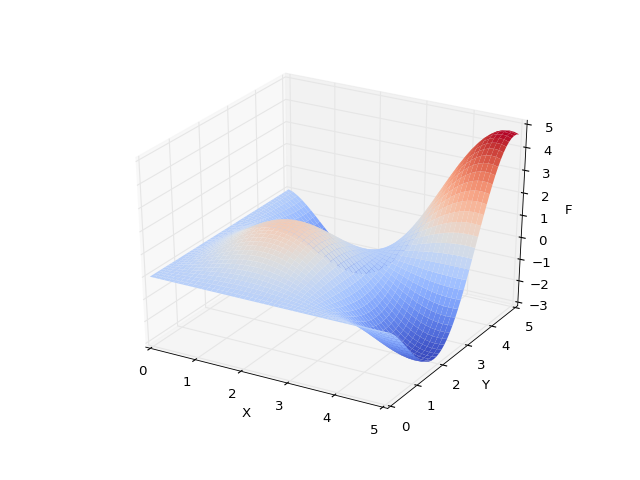

<IPython.core.display.Javascript object>


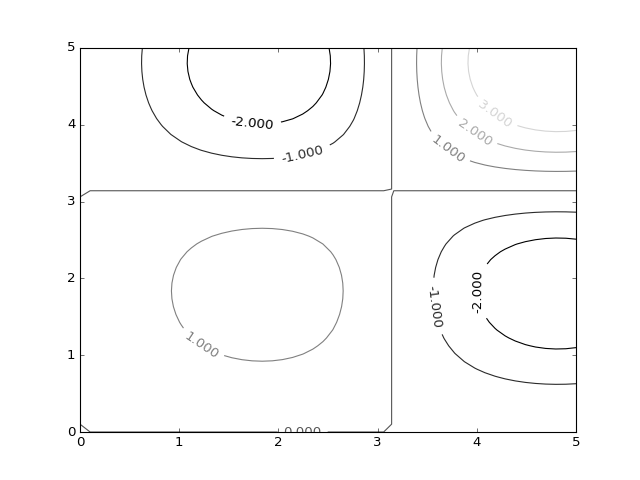

In [75]:
%matplotlib nbagg
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')

X = SHc.C[:, 0]
# X = numpy.sort(SHGO.C[:, 0])
X = numpy.linspace(SHc.bounds[0][0], SHc.bounds[0][1])
Y = SHc.C[:, 1]
# Y = numpy.sort(SHGO.C[:, 1])
Y = numpy.linspace(SHc.bounds[1][0], SHc.bounds[1][1])
xg, yg = numpy.meshgrid(X, Y)
Z = numpy.zeros((xg.shape[0],
                 yg.shape[0]))

for i in range(xg.shape[0]):
    for j in range(yg.shape[0]):
        # Z[i, j] = SHGO.F[i]
        Z[i, j] = SHc.func([xg[i, j], yg[i, j]])

# =Z = SHGO.F

if True:
    ax.plot_surface(xg, yg, Z, rstride=1, cstride=1,
                    cmap=cm.coolwarm, linewidth=0,
                    antialiased=True, alpha=1.0, shade=True)
    if False:
        cset = ax.contour(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
        cset = ax.contour(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
        cset = ax.contour(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('F')
    plt.figure()
    cs = plt.contour(xg, yg, Z, cmap='binary_r')
    plt.clabel(cs)
plt.show()


<IPython.core.display.Javascript object>


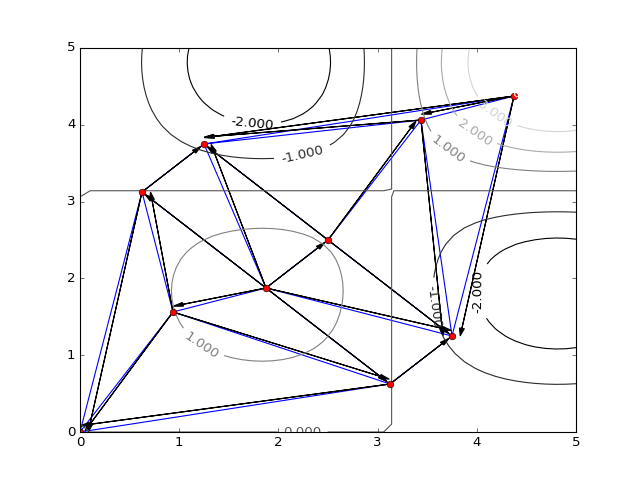

In [162]:
%matplotlib nbagg
def find_neighbors(pindex, triang):
    return triang.vertex_neighbor_vertices[1][
           triang.vertex_neighbor_vertices[0][pindex]:
           triang.vertex_neighbor_vertices[0][pindex + 1]]

import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
plt.figure()

points = SHc.C
tri = Delaunay(points)

# graph
plt.triplot(points[:, 0], points[:, 1], tri.simplices.copy())
plt.plot(points[:, 0], points[:, 1], 'o')

# directed
def direct_2d(ax, func, V1, V2, vertex_plot_size=0.1):
    """Draw a directed graph arrow between two vertices"""
    f_1 = func(V1)
    f_2 = func(V2)
    
    def vertex_diff(V_low, V_high, vertex_plot_size):
        # Note assumes bounds in R+ (0, inf)
        dV = [0, 0]
        for i in [0, 1]:
            if V_low[i] < V_high[i]:
                dV[i] = -(V_high[i] - V_low[i]) #+ vertex_plot_size
            else:
                dV[i] = V_low[i] - V_high[i]  #- vertex_plot_size
                
            if dV[i] > 0:
                dV[i] -= vertex_plot_size
            else:
                dV[i] += vertex_plot_size
                
        return dV
    
    if f_1 < f_2:  # direct V2 --> V1
        dV = vertex_diff(V1, V2, vertex_plot_size)
        #print(dV)        
        ax.arrow(V2[0], V2[1], dV[0], dV[1], head_width=0.05, head_length=0.1, fc='k', ec='k', color='b')
        
    elif f_1 > f_2:  # direct V1 --> V2
        pass
        #dV = vertex_diff(V1, V2, vertex_plot_size)
        #ax.arrow(V2[0], V2[1], dV[0], dV[1], head_width=0.05, head_length=0.1, fc='k', ec='k', color='b')
        
        
ax = plt.axes()
for i in range(points.shape[0]):
    for i2 in SHc.find_neighbors(i, SHc.Tri):
        #print(i, i2)
        direct_2d(ax, f, SHc.Tri.points[i, :], SHc.Tri.points[i2, :])
    #for i2 in range(i + 1, points.shape[0]):
        
        #direct_2d(ax, f, points[i, :], points[i2, :])
       # print(i, i2)
       #print(points[i, :])
        #print(points[i2, :])
        #direct_2d(f, P, P2)

# contour
cs = plt.contour(xg, yg, Z, cmap='binary_r')
plt.clabel(cs)   
plt.show()
    
#find_neighbors(i)

In [103]:
#help(ax.arrow)

In [133]:
SHc.Tri

In [135]:
# neighbor_indices = find_neighbors(0, tri)
neighbor_indices = SHc.find_neighbors(0, SHc.Tri)
print('neighbor_indices = find_neighbors(0, tri)'
      ' = {}'.format(neighbor_indices))
print('points[neighbor_indices] = '
      '{}'.format(points[neighbor_indices]))
print('SHGO.C [neighbor_indices] '
      '= {}'.format(SHc.C[neighbor_indices]))

neighbor_indices = find_neighbors(0, tri) = [8 7 6]
points[neighbor_indices] = [[ 0.9375  1.5625]
 [ 0.625   3.125 ]
 [ 3.125   0.625 ]]
SHGO.C [neighbor_indices] = [[ 0.9375  1.5625]
 [ 0.625   3.125 ]
 [ 3.125   0.625 ]]
